In [5]:
import pandas as pd
import numpy as np
import os
import requests
from IPython.display import Image as Ima
from IPython.display import clear_output, display
from PIL import Image as Im
import joblib
import matplotlib.pyplot as plt
import json
import base64
import shutil
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import linalg as LA
from tqdm import tqdm, trange
from PIL import Image
from imagehash import phash
import numpy as np
warnings.filterwarnings("ignore")

In [6]:
def show_pca(N):
    #N = np.load(filename)
    #N=np.matrix(N.T)*np.matrix(N)
    A,B,C=np.linalg.svd(N)
    eigen_values=B**2/np.sum(B**2)
    figure=plt.figure(figsize=(10,6))
    sing_vals=np.arange(len(eigen_values)) + 1
    plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue') 
    plt.show()
    print(eigen_values)

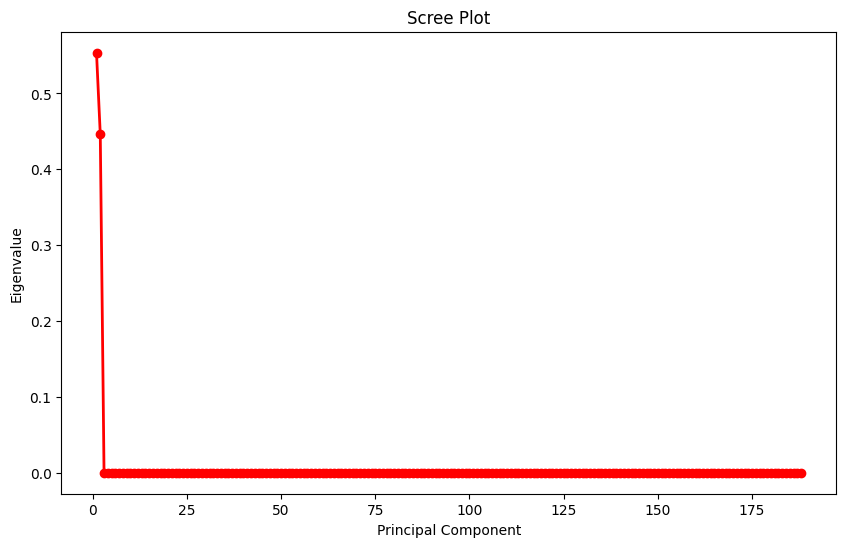

[5.53737528e-01 4.46262472e-01 2.78079833e-31 3.79964998e-32
 1.38621107e-32 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.42108674e-33 5.42108674e-33 5.42108674e-33
 5.42108674e-33 5.421086

In [7]:


data = np.load(f'file.npz')
show_pca(data['embeddings'])



explained variance ratio (first two components): [0.55487939 0.44512061]
[8.22204159 7.36409225]
(188, 2)
!!""##$$%%&&''(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCDDEEFFGGHHIIJJKKLLMMNNOOPPQQRRSSTTUUVVWWXXYYZZ[[\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz{{||}}~~


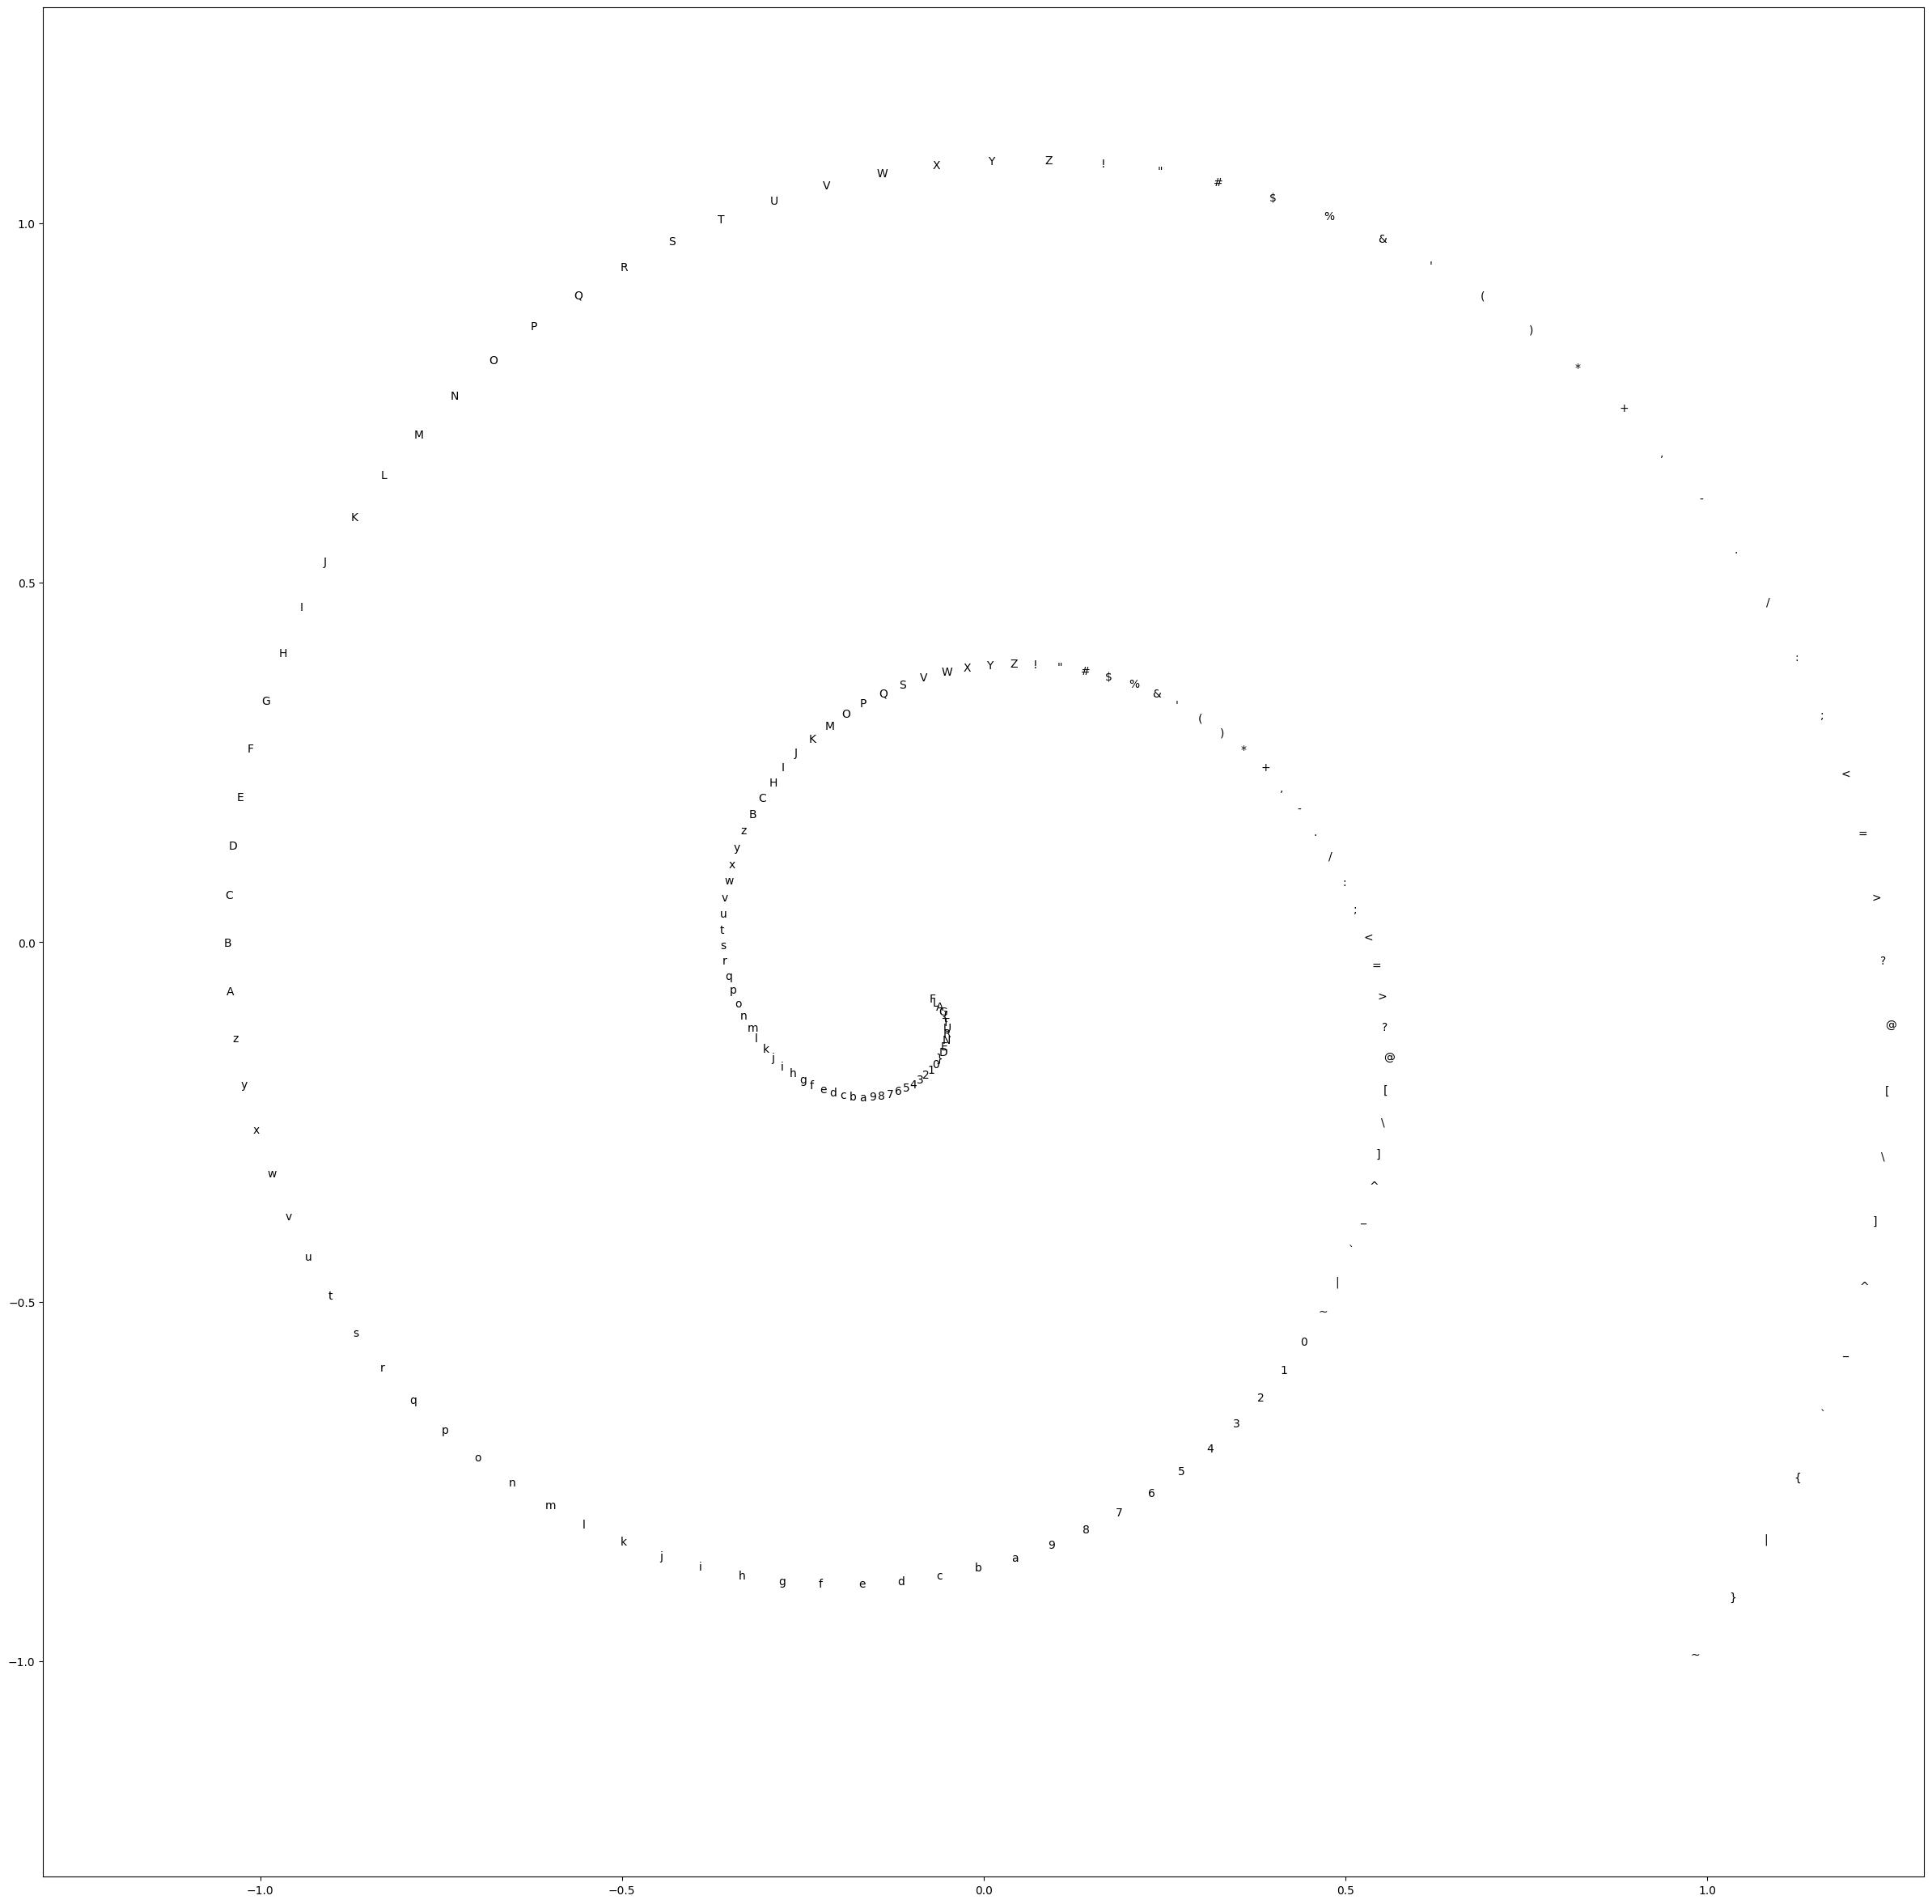

In [8]:
X = data['embeddings']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
print(pca.singular_values_)
print(X_r.shape)


fig, ax = plt.subplots(figsize=(30, 30))
ax.set_xlim([-1.3, 1.3])
ax.set_ylim([-1.3, 1.3])
#ax.scatter(X_r[:, 0], X_r[:, 1], color='navy', alpha=0.8, lw=2)

tokens = str(data['tokens'])
print(tokens)

for i, txt in enumerate(tokens):
    ax.annotate(txt, (X_r[i, 0], X_r[i, 1]))

In [9]:
embeddings = data['embeddings']
center = embeddings[75]
norms = LA.norm(embeddings, axis=1)
print(''.join(tokens[x] for x in np.argsort(norms)))

FLAG{TURNED}0123456789abcdefghijklmnopqrstuvwxyzBCHIJKMOPQSVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`|~0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
#save the flag to csv file ID, Flag as ID = 1, Flag = TURNED
data = {'ID': [1], 'Flag': ['TURNED']}
df = pd.DataFrame(data)

df.to_csv('flag.csv', index=False)
